In [ ]:
import cv2
import numpy as np
from google.colab import drive
from google.colab import files
from PIL import Image
from PIL import ImageOps
from PIL import ImageEnhance
import matplotlib.pyplot as plt
%matplotlib inline

#позволяет просматривать изображения cv2 в блокноте
from google.colab.patches import cv2_imshow

In [ ]:
#подключает облачный диск Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


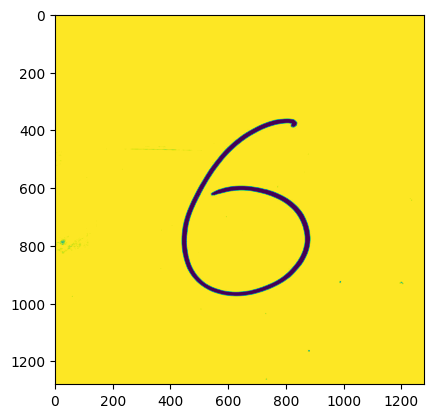

In [ ]:
#загрузка изображения в переменную img
img = Image.open('/content/gdrive/MyDrive/Colab Notebooks/custom_dataset/Test101/6.jpg')
#конвертация изображения в оттенки серого
img = img.convert('L')
#увеличение контраста
enhancer = ImageEnhance.Contrast(img)
img = enhancer.enhance(2)
#сохранение изображения для последующего открытия в OpenCV
img.save('123.png')
#вывод изображения в блокнот
plt.imshow(img)
plt.show()

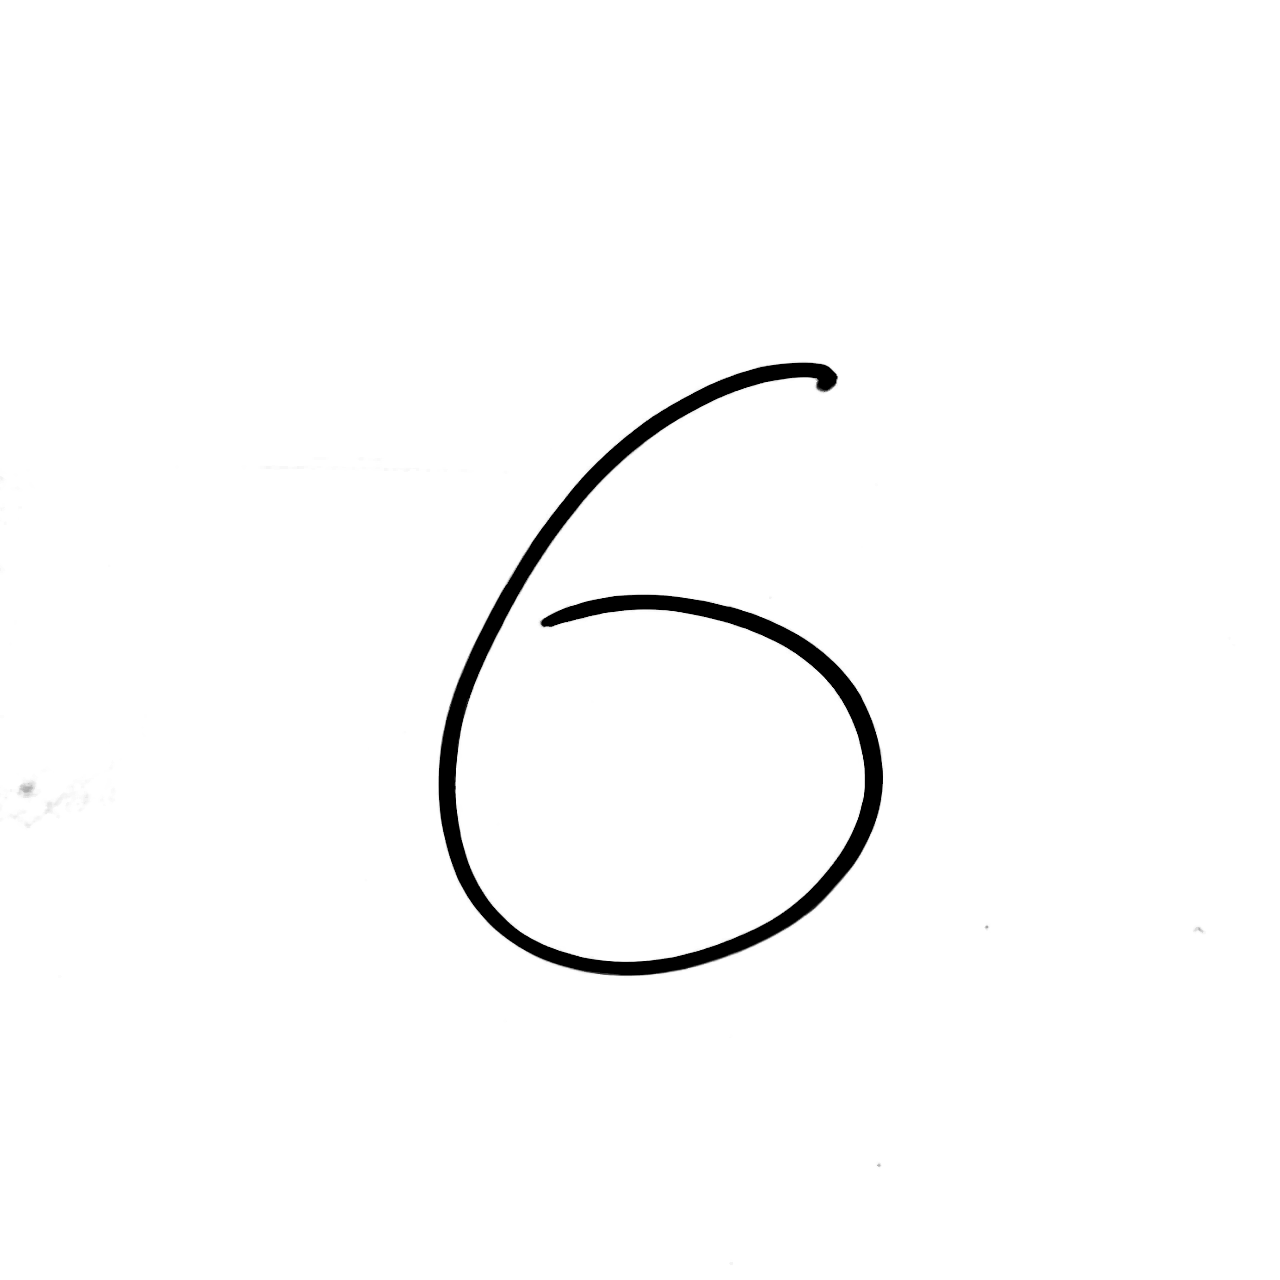

In [ ]:
#открытие изображения в OpenCV и добавление медианного размытия для снижения шумов
img = cv2.imread('/content/123.png', 0)
img = cv2.medianBlur(img,5)
cv2_imshow(img)

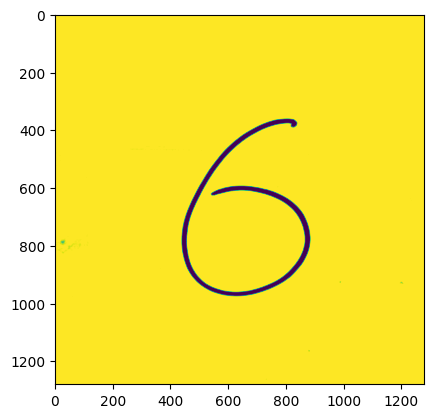

In [ ]:
#обратное сохранение изображения для обработки с помощью PLT
img = Image.fromarray(img)
plt.imshow(img)
plt.show()

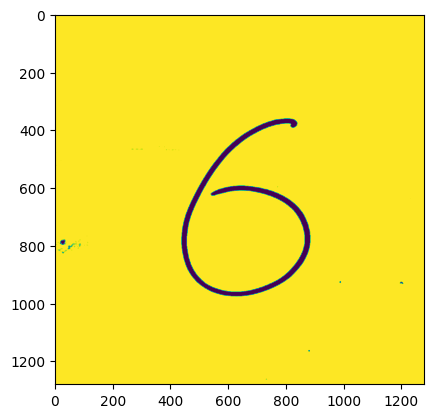

In [ ]:
#увеличение контраста
enhancer = ImageEnhance.Contrast(img)
img = enhancer.enhance(15)
img.save('123.png')
plt.imshow(img)
plt.show()

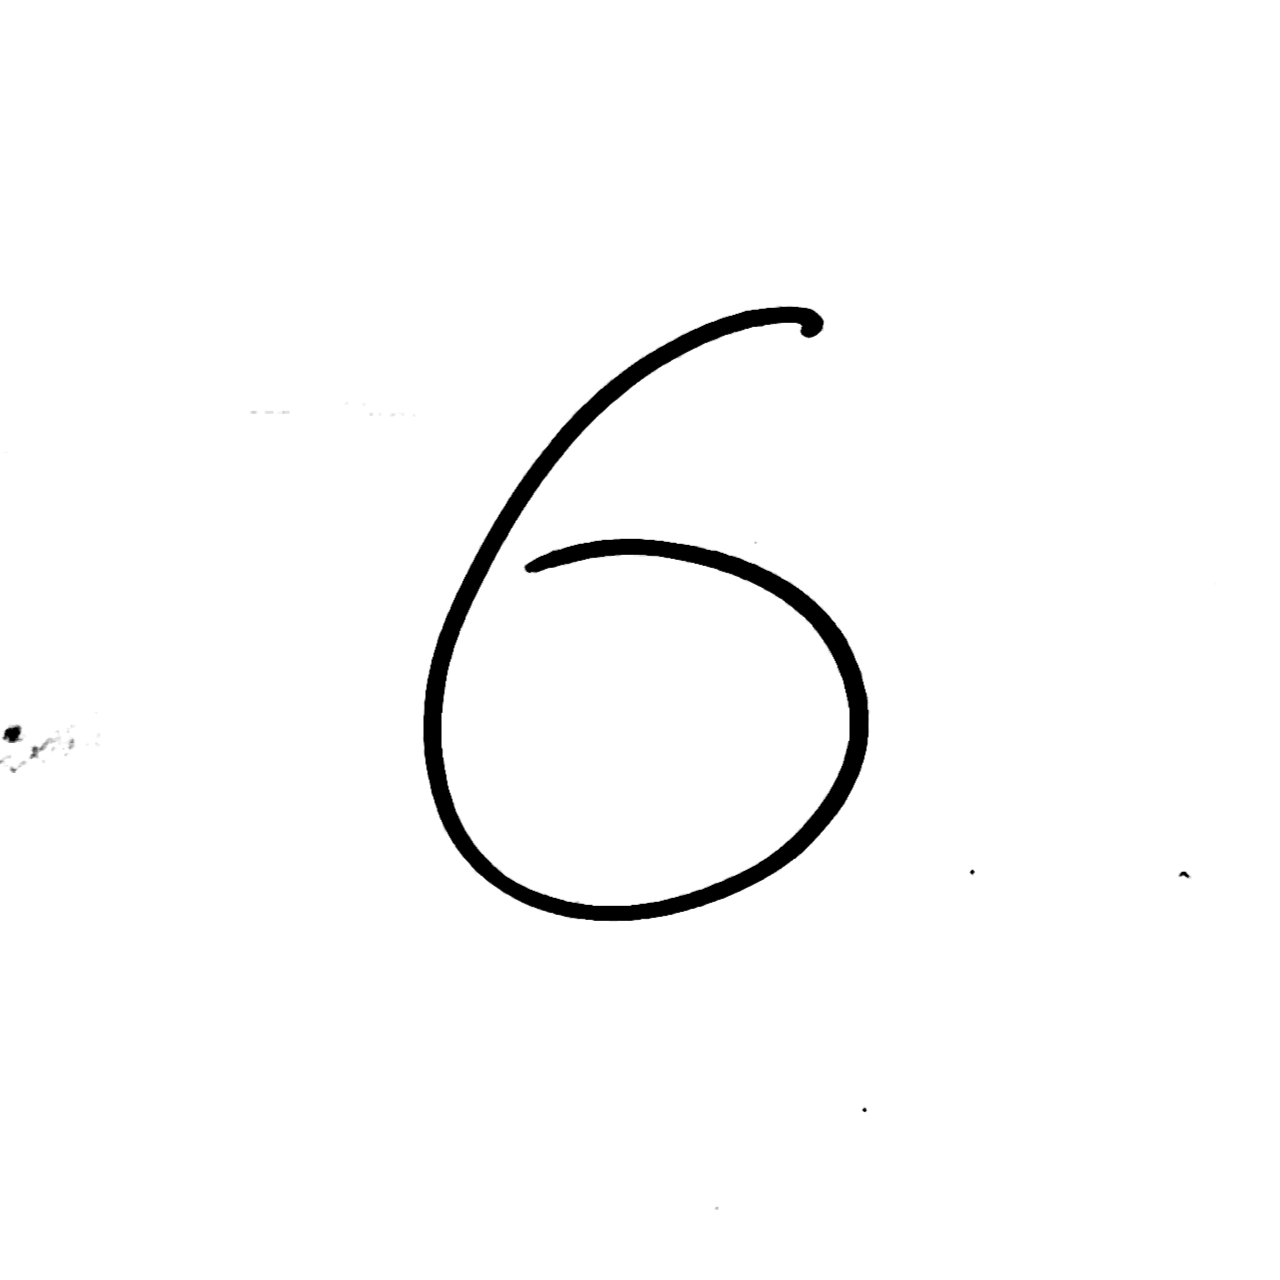

In [ ]:
#отцентровка изображения по центру масс пикселей

#изображение загружается в оттенках серого
img = cv2.imread('123.png', 0)

#эта строка находит индексы всех пикселей, значение которых равно нулю
Y, X = np.nonzero(img == 0)
#вычисляет центр масс черных пикселей
center_of_mass = (np.mean(X), np.mean(Y))

#получает размеры изображения
height, width = img.shape
#вычисление смещения от центра изображения до центра масс
shiftX = width//2 - center_of_mass[0]
shiftY = height//2 - center_of_mass[1]

#применяет смещение
M = np.float32([[1, 0, shiftX], [0, 1, shiftY]])
img = cv2.warpAffine(img, M, (width, height), borderValue=255)

#выводит изображение
cv2_imshow(img)

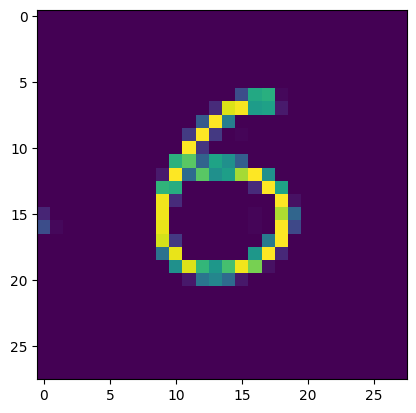

In [ ]:
img = Image.fromarray(img)
#форматирование изображения и нормализация
img = img.resize((28, 28), Image.ANTIALIAS)
#увеличение контраста
enhancer = ImageEnhance.Contrast(img)
img = enhancer.enhance(2.6)
#инвертирует цвета (белый в чёрный и наоборот)
img = ImageOps.invert(img)
#сохранение изображения в указаной директории
img.save('/content/gdrive/MyDrive/Colab Notebooks/custom_dataset/Test101/Rdy/6.png')
plt.imshow(img)
plt.show()